# Exploratory Data Analysis (EDA)

**Input**: Датасет `data/raw/df_common.csv`

---

## 0. Preparations

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from collections import Counter

import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

df = pd.read_csv('data/raw/df_common.csv', index_col=0)
df = df.drop('nickname', axis=1)

def print_separator(name: str = '', length = 100):
    print('=' * length)
    if len(name) != 0: 
        print(name.upper())
        print('=' * length, '\n')

print_separator('data reading')

print(f'dataset size: {df.shape[0]:,} rows, {df.shape[1]} columns')
print(f'columns names: {list(df.columns)}')
print('first 10 rows:')
display(df.head(10))

print_separator('dataset info')
df.info()

DATA READING

dataset size: 407,956 rows, 7 columns
columns names: ['raw_text_id', 'dataset_id', 'source_platform', 'is_verified', 'text_raw', 'is_toxic', 'toxicity_type']
first 10 rows:


,raw_text_id,dataset_id,source_platform,is_verified,text_raw,is_toxic,toxicity_type
0,0,0,"2ch, pikabu",1,"Верблюдов-то за что? Дебилы, бл...\n",1.0,NaN
1,1,0,"2ch, pikabu",1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,NaN
2,2,0,"2ch, pikabu",1,Собаке - собачья смерть\n,1.0,NaN
3,3,0,"2ch, pikabu",1,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,NaN
4,4,0,"2ch, pikabu",1,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,NaN
5,5,0,"2ch, pikabu",1,Для каких стан является эталоном современная с...,1.0,NaN
6,6,0,"2ch, pikabu",1,В шапке были ссылки на инфу по текущему фильму...,0.0,NaN
7,7,0,"2ch, pikabu",1,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0,NaN
8,8,0,"2ch, pikabu",1,"Ебать тебя разносит, шизик.\n",1.0,NaN
9,9,0,"2ch, pikabu",1,"Обосрался, сиди обтекай\n",1.0,NaN


DATASET INFO

<class 'pandas.core.frame.DataFrame'>
Index: 407956 entries, 0 to 407955
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   raw_text_id      407956 non-null  int64  
 1   dataset_id       407956 non-null  int64  
 2   source_platform  407956 non-null  object 
 3   is_verified      407956 non-null  int64  
 4   text_raw         407956 non-null  object 
 5   is_toxic         35087 non-null   float64
 6   toxicity_type    372869 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 24.9+ MB


## 1. Basic statistics (df.describe)


In [498]:
print_separator('basic statistics about dataset fields')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
raw_text_id,407956.0,NaN,NaN,NaN,203977.5,117766.897546,0.0,101988.75,203977.5,305966.25,407955.0
dataset_id,407956.0,NaN,NaN,NaN,1.555383,1.290097,0.0,1.0,1.0,2.0,7.0
source_platform,407956,8,ok.ru,248283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,407956.0,NaN,NaN,NaN,0.949321,0.219343,0.0,1.0,1.0,1.0,1.0
text_raw,407956,393540,"А у тебя писечка поперек, или это только от ма...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,35087.0,NaN,NaN,NaN,0.320489,0.466671,0.0,0.0,0.0,1.0,1.0
toxicity_type,372869,6,NORMAL,203681,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Missing values analysis

MISSING DATA

          Field  missings    %
    raw_text_id         0  0.0
     dataset_id         0  0.0
source_platform         0  0.0
    is_verified         0  0.0
       text_raw         0  0.0
       is_toxic    372869 91.4
  toxicity_type     35087  8.6
Dataset sparsity: 14.29%
Total cells count: 2,855,692
Total missing cells count: 407,956


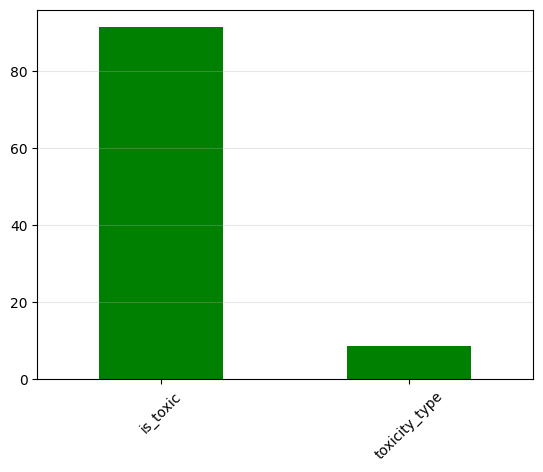

In [499]:
print_separator('missing data')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Процент пропущенных значений'
plt.ylabel = 'Процент (%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

// TODO: replace this logic to dataset parcer + creator

1. **Вычисление `is_toxic` из `toxicity_type`**,
    - Если `is_toxic` отсутствует, вычисляем его из типа токсичности,
    - Токсичные типы (`INSULT`, `THREAT`, etc.) → `is_toxic = 1`,
    - Нетоксичный тип (`NORMAL`) → `is_toxic = 0`,
    - **Результат**: Максимальное использование доступной разметки,
2. **Заполнение `toxicity_type = 'NORMAL'`**,
    - Если `toxicity_type` пустой и `is_toxic == 0` → заполняем `NORMAL`,
    - **Результат**: Консистентность данных,

In [500]:
toxic_types = ['INSULT', 'INAPPROPRIATE', 'THREAT', 'OBSCENITY', 'SENSITIVE']
non_toxic_types = ['NORMAL']

# toxicity_type -> is_toxic, if is_toxic is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
if mask_compute_toxic.sum() > 0:
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(toxic_types), 'is_toxic'] = 1.0
    df.loc[mask_compute_toxic & df['toxicity_type'].isin(non_toxic_types), 'is_toxic'] = 0.0

# is_toxic == 1 -> toxicity_type == 'NORMAL', if toxicity_type is empty
mask_compute_toxic = df['is_toxic'].isna() & df['toxicity_type'].notna()
mask_fill_normal = (df['is_toxic'] == 0) & df['toxicity_type'].isna()
filled_count = mask_fill_normal.sum()
if filled_count > 0:
    df.loc[mask_fill_normal, 'toxicity_type'] = 'NORMAL'

print_separator('basic statistics about dataset fields with toxic info field recovery')
display(df.describe(include='all').T)

BASIC STATISTICS ABOUT DATASET FIELDS WITH TOXIC INFO FIELD RECOVERY



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
raw_text_id,407956.0,NaN,NaN,NaN,203977.5,117766.897546,0.0,101988.75,203977.5,305966.25,407955.0
dataset_id,407956.0,NaN,NaN,NaN,1.555383,1.290097,0.0,1.0,1.0,2.0,7.0
source_platform,407956,8,ok.ru,248283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_verified,407956.0,NaN,NaN,NaN,0.949321,0.219343,0.0,1.0,1.0,1.0,1.0
text_raw,407956,393540,"А у тебя писечка поперек, или это только от ма...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_toxic,407956.0,NaN,NaN,NaN,0.442285,0.496658,0.0,0.0,0.0,1.0,1.0
toxicity_type,396711,6,NORMAL,227523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MISSING DATA WITH TOXIC INFO FIELD RECOVERY

          Field  missings    %
    raw_text_id         0 0.00
     dataset_id         0 0.00
source_platform         0 0.00
    is_verified         0 0.00
       text_raw         0 0.00
       is_toxic         0 0.00
  toxicity_type     11245 2.76
Dataset sparsity: 0.39%
Total cells count: 2,855,692
Total missing cells count: 11,245


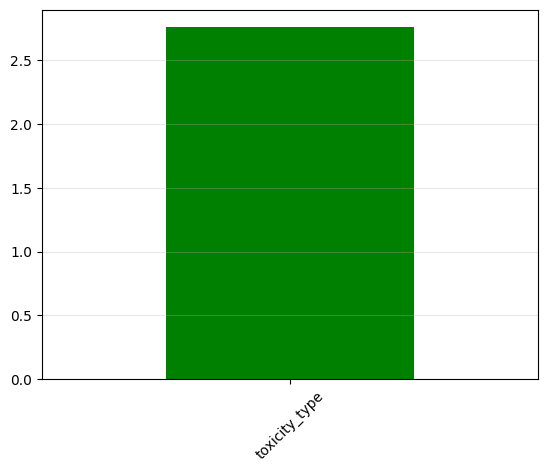

In [501]:
print_separator('missing data with toxic info field recovery')

missing_data = pd.DataFrame({
    'Field': df.columns,
    'missings': df.isnull().sum(),
    '%': (df.isnull().sum() / len(df) * 100).round(2),
})

print(missing_data.to_string(index=False))

print_separator()

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
sparsity = (total_missing / total_cells) * 100

print(f'Dataset sparsity: {sparsity:.2f}%')
print(f'Total cells count: {total_cells:,}')
print(f'Total missing cells count: {total_missing:,}')

missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent[missing_percent > 0].plot(kind='bar', color='green')
plt.title = 'Persent of missing values'
plt.ylabel = '(%)'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show() 

## 2. Duplicates and mistakes

In [502]:
print_separator('text duplicate check')

duplicates_count = df.duplicated(subset=['text_raw']).sum()
print(f'{duplicates_count} text duplicate found')

if duplicates_count > 0:
    df = df.drop_duplicates(subset=['text_raw'])
    print(f'Duplicate text removed. There are {len(df)} unique rows left')


TEXT DUPLICATE CHECK

14416 text duplicate found
Duplicate text removed. There are 393540 unique rows left


In [503]:
print_separator('mistakes')

# 1. `is_toxic` must be 0 or 1
print('\n1. `is_toxic` value:')
invalid_toxic = ~df['is_toxic'].isin([0.0, 1.0, 0, 1])
value_mistakes = df[invalid_toxic]
print(f'   value mistakes count: {len(value_mistakes)}')

# 1. `is_toxic` should not conflict with `toxicity_type`
print('\n2. `is_toxic` and `toxicity_type` conflict:')
conflicting_toxic_status = (
    (df['is_toxic'] == 0.0) & 
    df['toxicity_type'].isin(toxic_types)
) | (
    (df['is_toxic'] == 1.0) & 
    df['toxicity_type'].isin(non_toxic_types)
)
conflict_mistakes = df[conflicting_toxic_status]
print(f'   conflict mistakes count: {len(conflict_mistakes)}')

print('\n2. Text length:')
min_len = df['text_raw'].str.len().min()
max_len = df['text_raw'].str.len().max()
print(f'   min: {min_len}, max: {max_len}')

short_texts = (df['text_raw'].str.len() < 3).sum()
if short_texts > 0:
    print(f'   {short_texts} rows with length < 3 symbols found')
    df = df[df['text_raw'].str.len() >= 3]

print(f'\nfinal size: {len(df)}')


MISTAKES


1. `is_toxic` value:
   value mistakes count: 0

2. `is_toxic` and `toxicity_type` conflict:
   conflict mistakes count: 0

2. Text length:
   min: 1, max: 11088
   8 rows with length < 3 symbols found

final size: 393532


## 3. Toxicity destribution

BINARY TOXICITY DESTRIBUTION

Toxic: 175603 (44.62%)
Non toxic: 217929 (55.38%)
Disbalance: 1:1.24


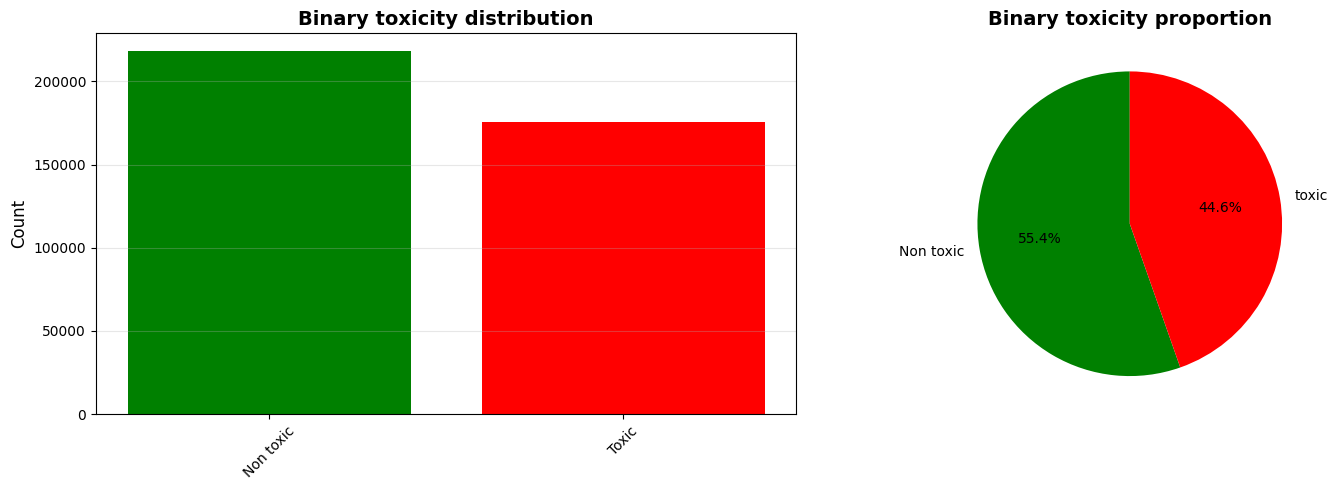

In [504]:
print_separator('binary toxicity destribution')

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print(f'Toxic: {len(toxic)} ({len(toxic)/len(df)*100:.2f}%)')
print(f'Non toxic: {len(non_toxic)} ({len(non_toxic)/len(df)*100:.2f}%)')
print(f'Disbalance: 1:{len(non_toxic)/len(toxic):.2f}')

_, (binary_bar, binary_pie) = plt.subplots(1, 2, figsize=(15, 5))

counts = df['is_toxic'].value_counts()
binary_bar.bar(['Non toxic', 'Toxic'], counts.values, color=['green', 'red'])
binary_bar.set_title('Binary toxicity distribution', fontsize=14, fontweight='bold')
binary_bar.set_ylabel('Count', fontsize=12)
binary_bar.tick_params(axis='x', rotation=45)
binary_bar.grid(axis='y', alpha=0.3)


binary_pie.pie(counts.values, labels=['Non toxic', 'toxic'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
binary_pie.set_title('Binary toxicity proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


NON BINARY TOXICITY DESTRIBUTION



toxicity_type
NORMAL           217929
SENSITIVE         91440
INSULT            36826
INAPPROPRIATE     33142
UNKNOWN TOXIC      6419
THREAT             5457
OBSCENITY          2319
Name: count, dtype: int64

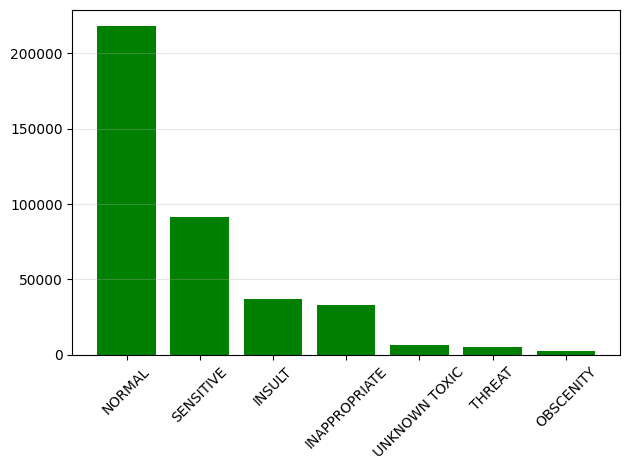

In [505]:
print_separator('non binary toxicity destribution')

types_counts = df['toxicity_type'].fillna('UNKNOWN TOXIC').value_counts()
display(types_counts)

plt.bar(types_counts.index, types_counts.values, color='green')
plt.title ='Non binary toxicity distribution'
plt.ylabel = 'Count'
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Basic statistics (lenght, symbols, words)

In [506]:
df['char_len'] = df['text_raw'].str.len()
df['word_len'] = df['text_raw'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words)')

stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['char_len'].mean(),
        non_toxic['char_len'].median(),
        non_toxic['char_len'].std(),
        non_toxic['word_len'].mean(),
        non_toxic['word_len'].median(),
        non_toxic['word_len'].std()
    ],
    'Toxic': [
        toxic['char_len'].mean(),
        toxic['char_len'].median(),
        toxic['char_len'].std(),
        toxic['word_len'].mean(),
        toxic['word_len'].median(),
        toxic['word_len'].std()
    ]
})
stats_df['Diff (%)'] = ((stats_df['Toxic'] - stats_df['Non toxic']) / stats_df['Non toxic'] * 100).round(2)

print(stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(stats_df.iloc[0]["Diff (%)"]):.1f}% tan non toxic')


BASIC STATISTICS (LENGHT, UNIQUE WORDS)

       Metrics  Non toxic     Toxic  Diff (%)
  Mean symbols  83.283927 95.431991     14.59
median symbols  48.000000 74.000000     54.17
   Std symbols 116.244548 93.406132    -19.65
    Mean words  13.262292 15.264910     15.10
  median words   8.000000 12.000000     50.00
     Std words  18.196035 14.884931    -18.20

Small conclusion: average toxic texts are shorter on 14.6% tan non toxic


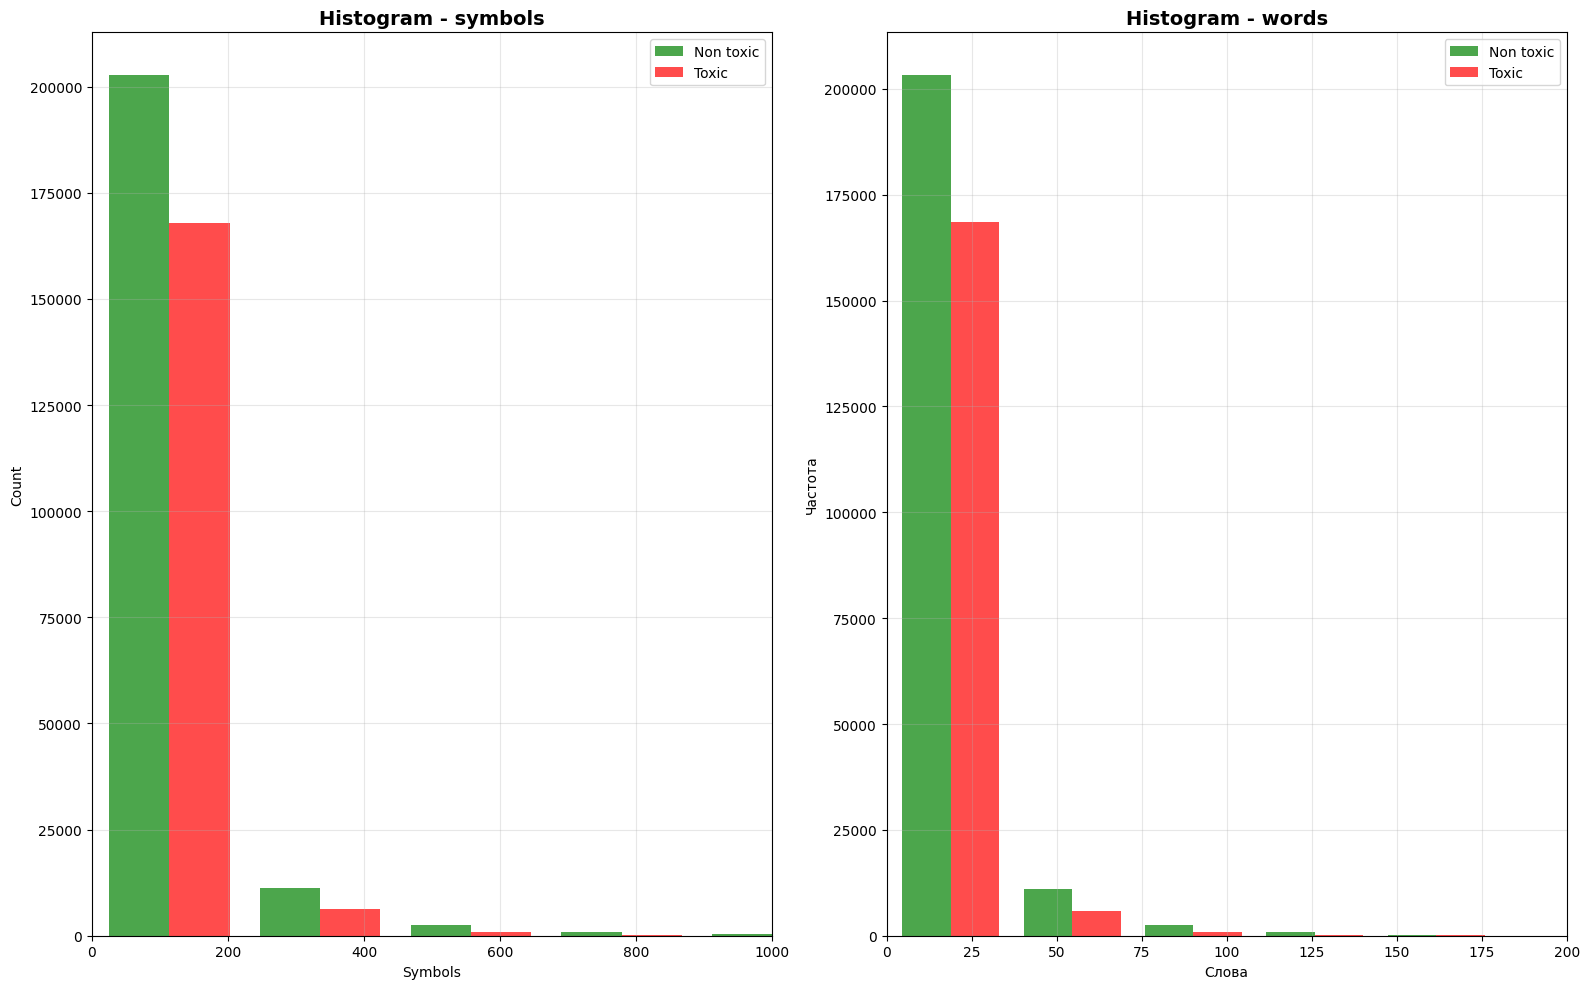

In [507]:
_, (symbols_histogram, words_histogram) = plt.subplots(1, 2, figsize=(16, 10))

# Histogram - symbols
symbols_histogram.hist([non_toxic['char_len'], toxic['char_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
symbols_histogram.set_title('Histogram - symbols', fontsize=14, fontweight='bold')
symbols_histogram.set_xlabel('Symbols')
symbols_histogram.set_ylabel('Count')
symbols_histogram.set_xlim(0, 1000)
symbols_histogram.legend()
symbols_histogram.grid(alpha=0.3)

# Histogram - words
words_histogram.hist([non_toxic['word_len'], toxic['word_len']], bins=50,
                label=['Non toxic', 'Toxic'], alpha=0.7, color=['green', 'red'])
words_histogram.set_title('Histogram - words', fontsize=14, fontweight='bold')
words_histogram.set_xlabel('Слова')
words_histogram.set_ylabel('Частота')
words_histogram.set_xlim(0, 200)
words_histogram.legend()
words_histogram.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Token-Level Analysis


In [508]:
## TODO: impl normal cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # URLs
    text = re.sub(r'[^а-яёa-z\s]', ' ', text)   # Только буквы
    return ' '.join(text.split())

df['text_clean'] = df['text_raw'].apply(clean_text)
df['tokens'] = df['text_clean'].apply(lambda x: x.split())
df['unique_words'] = df['tokens'].apply(lambda x: len(set(x)))

print(f'Symbols mean after clearing mean: {df["text_clean"].str.len().mean():.1f} symbols')

Symbols mean after clearing mean: 84.1 symbols


In [509]:
df['cleaned_char_len'] = df['text_clean'].str.len()
df['cleaned_word_len'] = df['text_clean'].str.split().str.len()

toxic = df[df['is_toxic'] == 1]
non_toxic = df[df['is_toxic'] == 0]

print_separator('Basic statistics (lenght, unique words) after cleaning')

cleaned_stats_df = pd.DataFrame({
    'Metrics': ['Mean symbols', 'median symbols', 'Std symbols',
                'Mean words', 'median words', 'Std words'],
    'Non toxic': [
        non_toxic['cleaned_char_len'].mean(),
        non_toxic['cleaned_char_len'].median(),
        non_toxic['cleaned_char_len'].std(),
        non_toxic['cleaned_word_len'].mean(),
        non_toxic['cleaned_word_len'].median(),
        non_toxic['cleaned_word_len'].std()
    ],
    'Toxic': [
        toxic['cleaned_char_len'].mean(),
        toxic['cleaned_char_len'].median(),
        toxic['cleaned_char_len'].std(),
        toxic['cleaned_word_len'].mean(),
        toxic['cleaned_word_len'].median(),
        toxic['cleaned_word_len'].std()
    ]
})
cleaned_stats_df['Diff'] = ((cleaned_stats_df['Toxic'] - cleaned_stats_df['Non toxic']) / cleaned_stats_df['Non toxic'] * 100).round(2)

print(cleaned_stats_df.to_string(index=False))
print(f'\nSmall conclusion: average toxic texts are shorter on {abs(cleaned_stats_df.iloc[0]["Diff"]):.1f}% tan non toxic after cleaning')

BASIC STATISTICS (LENGHT, UNIQUE WORDS) AFTER CLEANING

       Metrics  Non toxic     Toxic   Diff
  Mean symbols  78.100028 91.466530  17.11
median symbols  44.000000 71.000000  61.36
   Std symbols 111.277897 90.140527 -19.00
    Mean words  13.236577 15.418632  16.49
  median words   8.000000 12.000000  50.00
     Std words  18.094287 14.915127 -17.57

Small conclusion: average toxic texts are shorter on 17.1% tan non toxic after cleaning


### 6. Frequency of words

FREQUENCY OF WORDS


Words count (toxic texts): 2,707,558
Unique words count (toxic texts): 226,648

Words count (non toxic texts): 2,884,634
Unique words count (non toxic texts): 224,168

Top-20 frequent words (toxic texts):
  и              : 84972
  не             : 74827
  в              : 72527
  на             : 43728
  что            : 39346
  а              : 37905
  с              : 28727
  это            : 27792
  number         : 26857
  я              : 24598

Top-20 frequent words (non toxic texts):
  и              : 96962
  не             : 75997
  в              : 75479
  а              : 44606
  на             : 42338
  что            : 34613
  с              : 32997
  это            : 28553
  я              : 24042
  как            : 21854


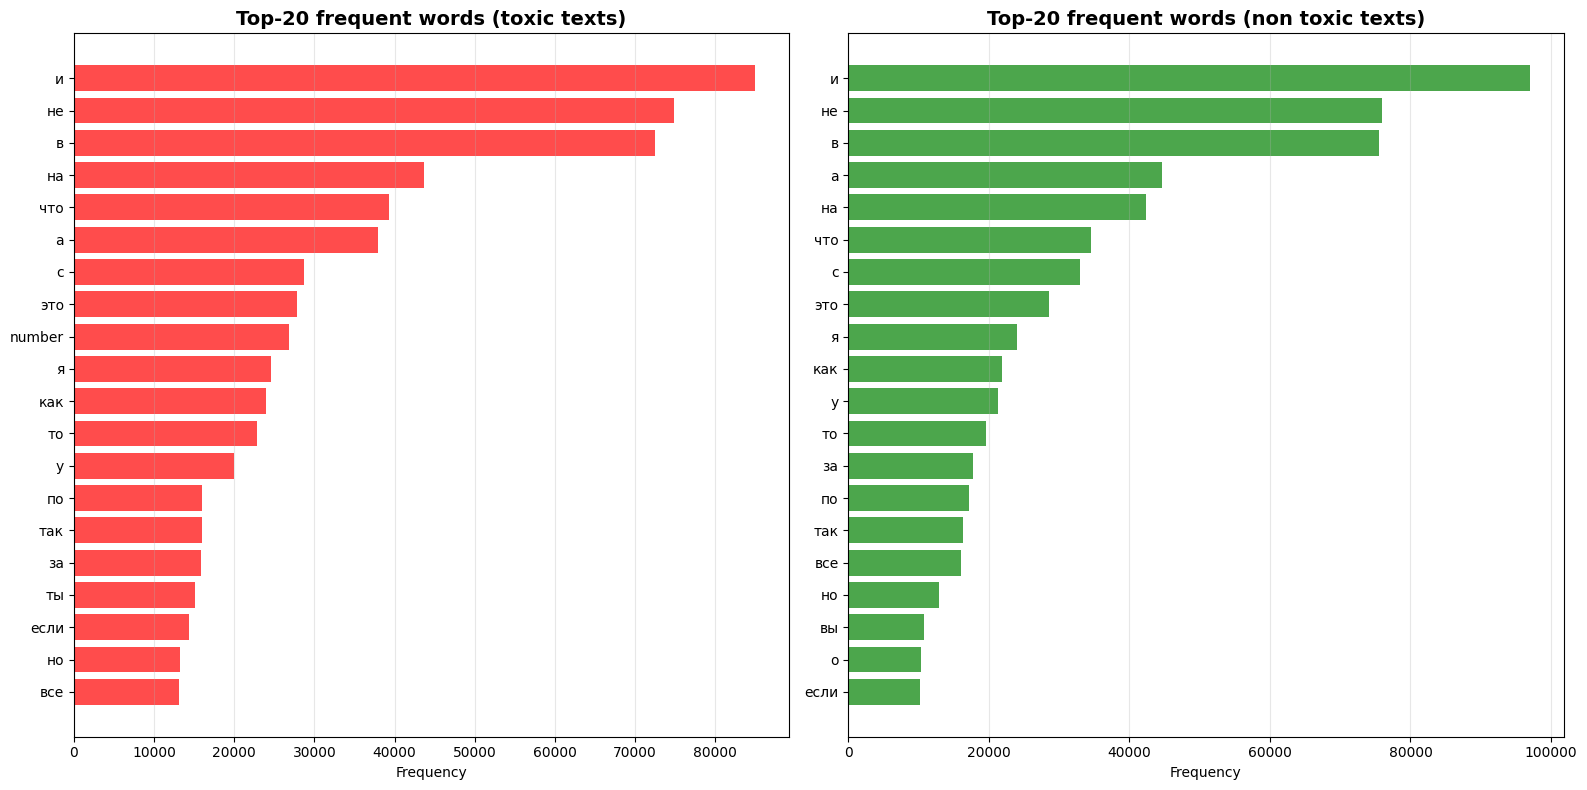

In [510]:
toxic_words = [word for tokens in toxic['tokens'] for word in tokens]
non_toxic_words = [word for tokens in non_toxic['tokens'] for word in tokens]

toxic_freq = Counter(toxic_words)
non_toxic_freq = Counter(non_toxic_words)

print_separator('Frequency of words')

print(f'\nWords count (toxic texts): {len(toxic_words):,}')
print(f'Unique words count (toxic texts): {len(set(toxic_words)):,}')
print(f'\nWords count (non toxic texts): {len(non_toxic_words):,}')
print(f'Unique words count (non toxic texts): {len(set(non_toxic_words)):,}')

print('\nTop-20 frequent words (toxic texts):')
for word, count in toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

print('\nTop-20 frequent words (non toxic texts):')
for word, count in non_toxic_freq.most_common(10):
    print(f'  {word:15s}: {count}')

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic = pd.DataFrame(toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[0].barh(range(len(top_toxic)), top_toxic['Frequency'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic)))
axes[0].set_yticklabels(top_toxic['Word'])
axes[0].invert_yaxis()
axes[0].set_title('Top-20 frequent words (toxic texts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic = pd.DataFrame(non_toxic_freq.most_common(20), columns=['Word', 'Frequency'])
axes[1].barh(range(len(top_non_toxic)), top_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic)))
axes[1].set_yticklabels(top_non_toxic['Word'])
axes[1].invert_yaxis()
axes[1].set_title('Top-20 frequent words (non toxic texts)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### 9. Word Clouds


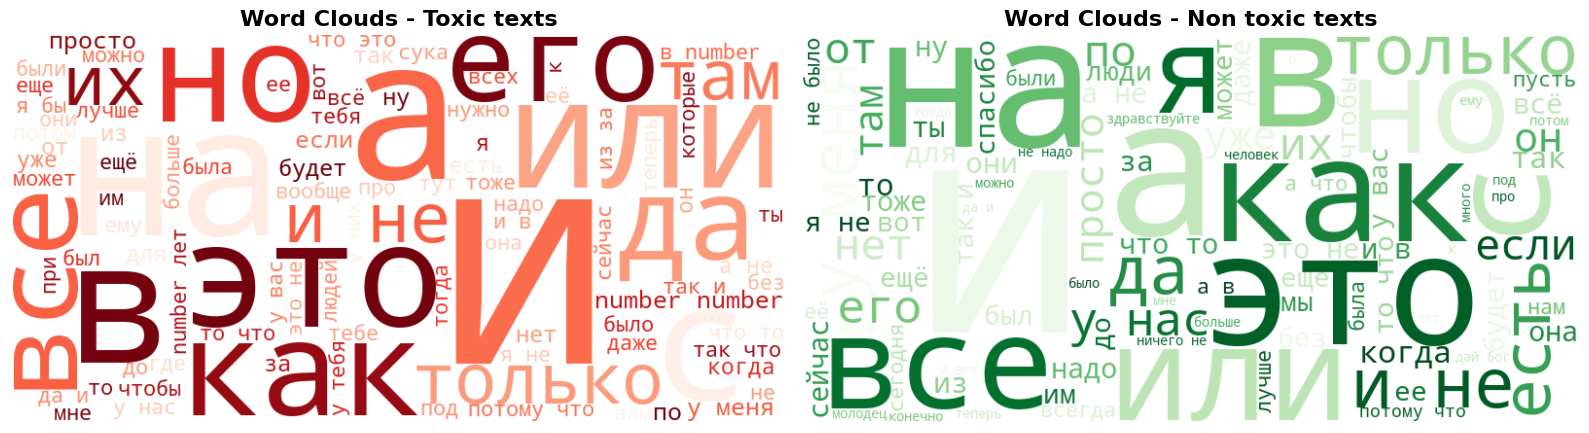

In [511]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))

toxic_text = ' '.join(toxic['text_clean'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white',
                              colormap='Reds', max_words=100).generate(toxic_text)

axes[0].imshow(wordcloud_toxic, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Clouds - Toxic texts', fontsize=16, fontweight='bold')

non_toxic_text = ' '.join(non_toxic['text_clean'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white',
                                  colormap='Greens', max_words=100).generate(non_toxic_text)

axes[1].imshow(wordcloud_non_toxic, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Clouds - Non toxic texts', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## 10. N-граммы (Bigrams и Trigrams)


Bigrams count(toxic text): 2,531,955, unique: 1,386,778
Bigrams count(non toxic text): 2,666,718, unique: 1,390,270
Trigrams count(toxic text): 2,356,828, unique: 2,090,501
Trigrams count(non toxic text): 2,452,456, unique: 2,118,212


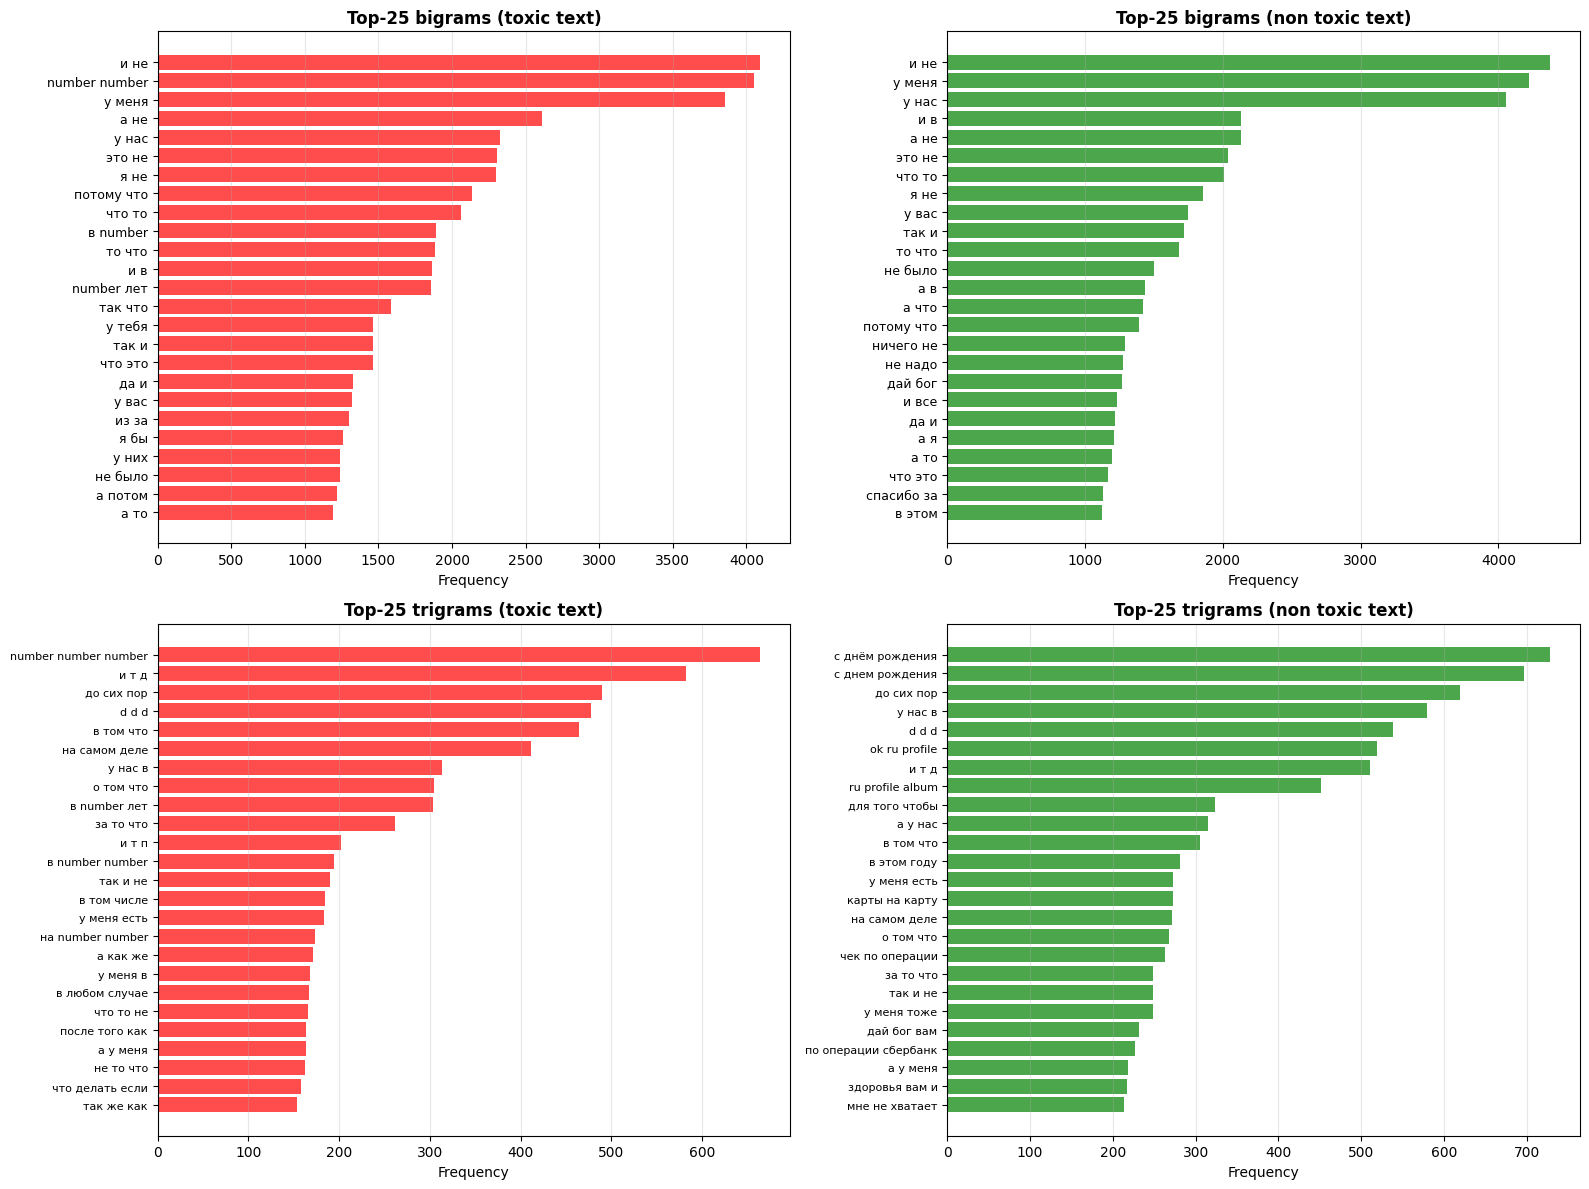

In [512]:
def get_ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

toxic_bigrams = []
toxic_trigrams = []
for tokens in toxic['tokens']:
    toxic_bigrams.extend(get_ngrams(tokens, 2))
    toxic_trigrams.extend(get_ngrams(tokens, 3))

non_toxic_bigrams = []
non_toxic_trigrams = []
for tokens in non_toxic['tokens']:
    non_toxic_bigrams.extend(get_ngrams(tokens, 2))
    non_toxic_trigrams.extend(get_ngrams(tokens, 3))

toxic_bi_freq = Counter(toxic_bigrams)
toxic_tri_freq = Counter(toxic_trigrams)
non_toxic_bi_freq = Counter(non_toxic_bigrams)
non_toxic_tri_freq = Counter(non_toxic_trigrams)

print(f'Bigrams count(toxic text): {len(toxic_bigrams):,}, unique: {len(toxic_bi_freq):,}')
print(f'Bigrams count(non toxic text): {len(non_toxic_bigrams):,}, unique: {len(non_toxic_bi_freq):,}')
print(f'Trigrams count(toxic text): {len(toxic_trigrams):,}, unique: {len(toxic_tri_freq):,}')
print(f'Trigrams count(non toxic text): {len(non_toxic_trigrams):,}, unique: {len(non_toxic_tri_freq):,}')

_, axes = plt.subplots(2, 2, figsize=(16, 12))

top_bi_toxic = pd.DataFrame(toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 0].barh(range(len(top_bi_toxic)), top_bi_toxic['Frequency'], color='red', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_bi_toxic)))
axes[0, 0].set_yticklabels(top_bi_toxic['Bigrams'], fontsize=9)
axes[0, 0].invert_yaxis()
axes[0, 0].set_title('Top-25 bigrams (toxic text)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Frequency')
axes[0, 0].grid(axis='x', alpha=0.3)

top_bi_non_toxic = pd.DataFrame(non_toxic_bi_freq.most_common(25), columns=['Bigrams', 'Frequency'])
axes[0, 1].barh(range(len(top_bi_non_toxic)), top_bi_non_toxic['Frequency'], color='green', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_bi_non_toxic)))
axes[0, 1].set_yticklabels(top_bi_non_toxic['Bigrams'], fontsize=9)
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Top-25 bigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].grid(axis='x', alpha=0.3)

top_tri_toxic = pd.DataFrame(toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 0].barh(range(len(top_tri_toxic)), top_tri_toxic['Frequency'], color='red', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_tri_toxic)))
axes[1, 0].set_yticklabels(top_tri_toxic['Trigrams'], fontsize=8)
axes[1, 0].invert_yaxis()
axes[1, 0].set_title('Top-25 trigrams (toxic text)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].grid(axis='x', alpha=0.3)

top_tri_non_toxic = pd.DataFrame(non_toxic_tri_freq.most_common(25), columns=['Trigrams', 'Frequency'])
axes[1, 1].barh(range(len(top_tri_non_toxic)), top_tri_non_toxic['Frequency'], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_tri_non_toxic)))
axes[1, 1].set_yticklabels(top_tri_non_toxic['Trigrams'], fontsize=8)
axes[1, 1].invert_yaxis()
axes[1, 1].set_title('Top-25 trigrams (non toxic text)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 11. TF-IDF analysis


In [513]:
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=1)

print(f'TF-IDF analysis with {sample_size:,} texts...')

vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), 
                              min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df_sample['text_clean'])
feature_names = vectorizer.get_feature_names_out()

print(f'TF-IDF matrix shape: {tfidf_matrix.shape}')
print(f'Features count: {len(feature_names)}')


TF-IDF analysis with 10,000 texts...
TF-IDF matrix shape: (10000, 1000)
Features count: 1000


TF-IDF ANALYSIS

Top-10 features(toxic texts):
feature    toxic  non_toxic
     не 0.064956   0.049939
     на 0.050236   0.037515
    что 0.040449   0.027051
 number 0.036737   0.000000
    это 0.035200   0.030268
    как 0.029950   0.022448
     то 0.026142   0.017100
     ты 0.024889   0.008329
     по 0.022496   0.019872
    так 0.021269   0.018184

Top-10 features(non toxic texts):
feature    toxic  non_toxic
     не 0.064956   0.049939
     на 0.050236   0.037515
    это 0.035200   0.030268
    что 0.040449   0.027051
    как 0.029950   0.022448
     по 0.022496   0.019872
     за 0.021203   0.019837
    все 0.016886   0.018253
    так 0.021269   0.018184
     то 0.026142   0.017100

Top-10 features by diff (toxic > non-toxic):
feature    toxic  non_toxic     diff
 number 0.036737   0.000000 0.036737
     ты 0.024889   0.008329 0.016559
     не 0.064956   0.049939 0.015017
    что 0.040449   0.027051 0.013399
     на 0.050236   0.037515 0.012721
     то 0.026142   0.017100 0.0090

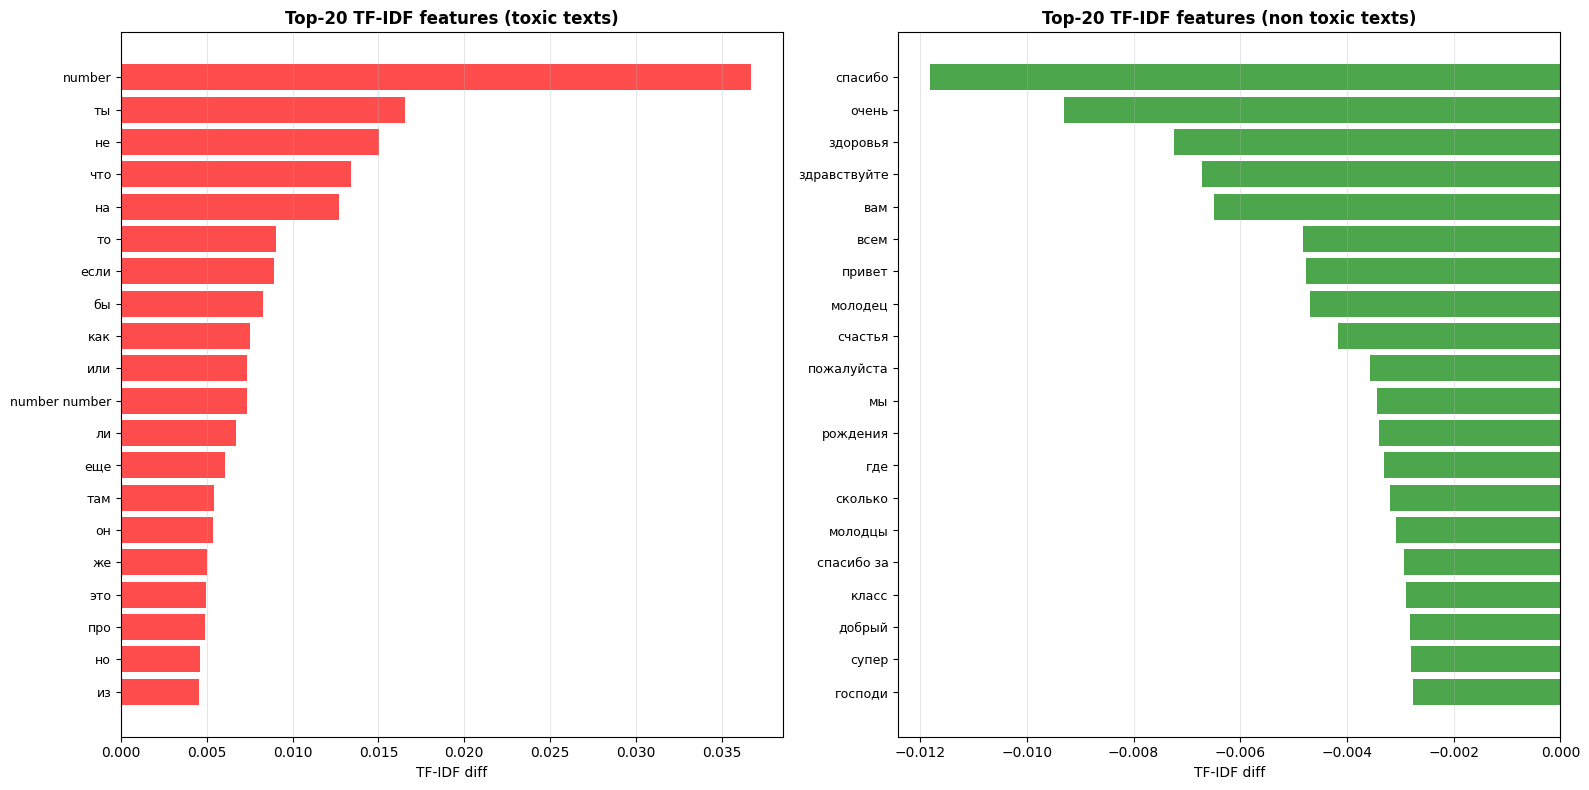

In [514]:
toxic_idx = df_sample[df_sample['is_toxic'] == 1].index
non_toxic_idx = df_sample[df_sample['is_toxic'] == 0].index

toxic_tfidf = tfidf_matrix[df_sample.index.isin(toxic_idx)].mean(axis=0).A1
non_toxic_tfidf = tfidf_matrix[df_sample.index.isin(non_toxic_idx)].mean(axis=0).A1

tfidf_df = pd.DataFrame({
    'feature': feature_names,
    'toxic': toxic_tfidf,
    'non_toxic': non_toxic_tfidf,
    'diff': toxic_tfidf - non_toxic_tfidf
})

print_separator('TF-IDF analysis')
print('Top-10 features(toxic texts):')
print(tfidf_df.nlargest(10, 'toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features(non toxic texts):')
print(tfidf_df.nlargest(10, 'non_toxic')[['feature', 'toxic', 'non_toxic']].to_string(index=False))

print('\nTop-10 features by diff (toxic > non-toxic):')
print(tfidf_df.nlargest(10, 'diff')[['feature', 'toxic', 'non_toxic', 'diff']].to_string(index=False))

_, axes = plt.subplots(1, 2, figsize=(16, 8))

top_toxic_tfidf = tfidf_df.nlargest(20, 'diff')
axes[0].barh(range(len(top_toxic_tfidf)), top_toxic_tfidf['diff'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_toxic_tfidf)))
axes[0].set_yticklabels(top_toxic_tfidf['feature'], fontsize=9)
axes[0].invert_yaxis()
axes[0].set_title('Top-20 TF-IDF features (toxic texts)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('TF-IDF diff')
axes[0].grid(axis='x', alpha=0.3)

top_non_toxic_tfidf = tfidf_df.nsmallest(20, 'diff')
axes[1].barh(range(len(top_non_toxic_tfidf)), top_non_toxic_tfidf['diff'], color='green', alpha=0.7)
axes[1].set_yticks(range(len(top_non_toxic_tfidf)))
axes[1].set_yticklabels(top_non_toxic_tfidf['feature'], fontsize=9)
axes[1].invert_yaxis()
axes[1].set_title('Top-20 TF-IDF features (non toxic texts)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('TF-IDF diff')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 12. correlation analysis

In [515]:
df.describe()

,raw_text_id,dataset_id,is_verified,is_toxic,char_len,word_len,unique_words,cleaned_char_len,cleaned_word_len
count,393532.000000,393532.000000,393532.000000,393532.000000,393532.000000,393532.000000,393532.000000,393532.000000,393532.000000
mean,196768.784076,1.355953,0.984095,0.446223,88.704672,14.155906,13.073819,84.064467,14.210260
std,113605.046341,0.774473,0.125107,0.497100,106.830142,16.828821,13.168269,102.601753,16.785455
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,98384.750000,1.000000,1.000000,0.000000,35.000000,6.000000,6.000000,32.000000,6.000000
50%,196768.500000,1.000000,1.000000,0.000000,60.000000,10.000000,9.000000,56.000000,10.000000
75%,295153.250000,2.000000,1.000000,1.000000,107.000000,17.000000,16.000000,102.000000,17.000000
max,393543.000000,7.000000,1.000000,1.000000,11088.000000,1785.000000,866.000000,11087.000000,1785.000000


CORRELATION ANALYSIS

Correlation with `is_toxic`:
is_toxic            1.000000
unique_words        0.085087
cleaned_char_len    0.064760
cleaned_word_len    0.064621
word_len            0.059155
char_len            0.056527
is_verified         0.049028
Name: is_toxic, dtype: float64


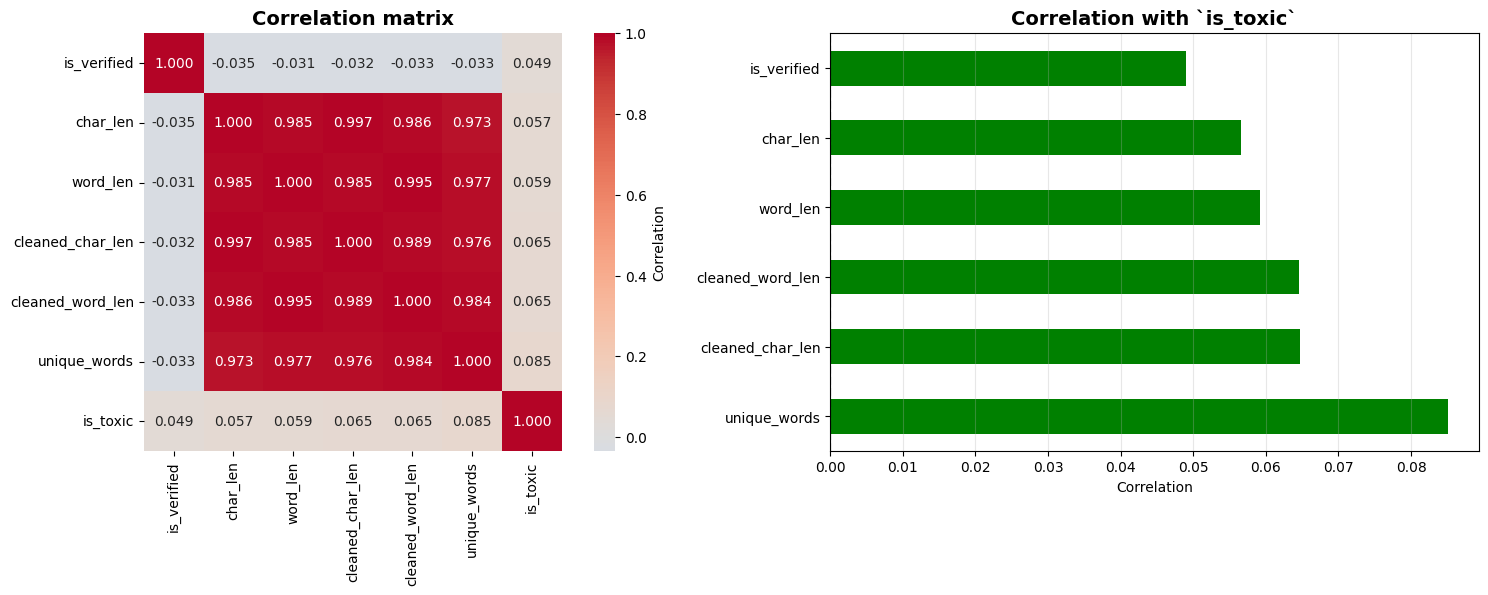

In [516]:
numeric_features = ['is_verified', 'char_len', 'word_len', 'cleaned_char_len', 'cleaned_word_len', 'unique_words', 'is_toxic']

corr_matrix = df[numeric_features].corr()

print_separator('correlation analysis')

print('Correlation with `is_toxic`:')
target_corr = corr_matrix['is_toxic'].sort_values(ascending=False)
print(target_corr)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlation matrix', fontsize=14, fontweight='bold')

target_corr_plot = target_corr.drop('is_toxic')
colors = ['green' if x > 0 else 'red' for x in target_corr_plot.values]
target_corr_plot.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Correlation with `is_toxic`', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation')
axes[1].axvline(x=0, color='black', linestyle='--')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


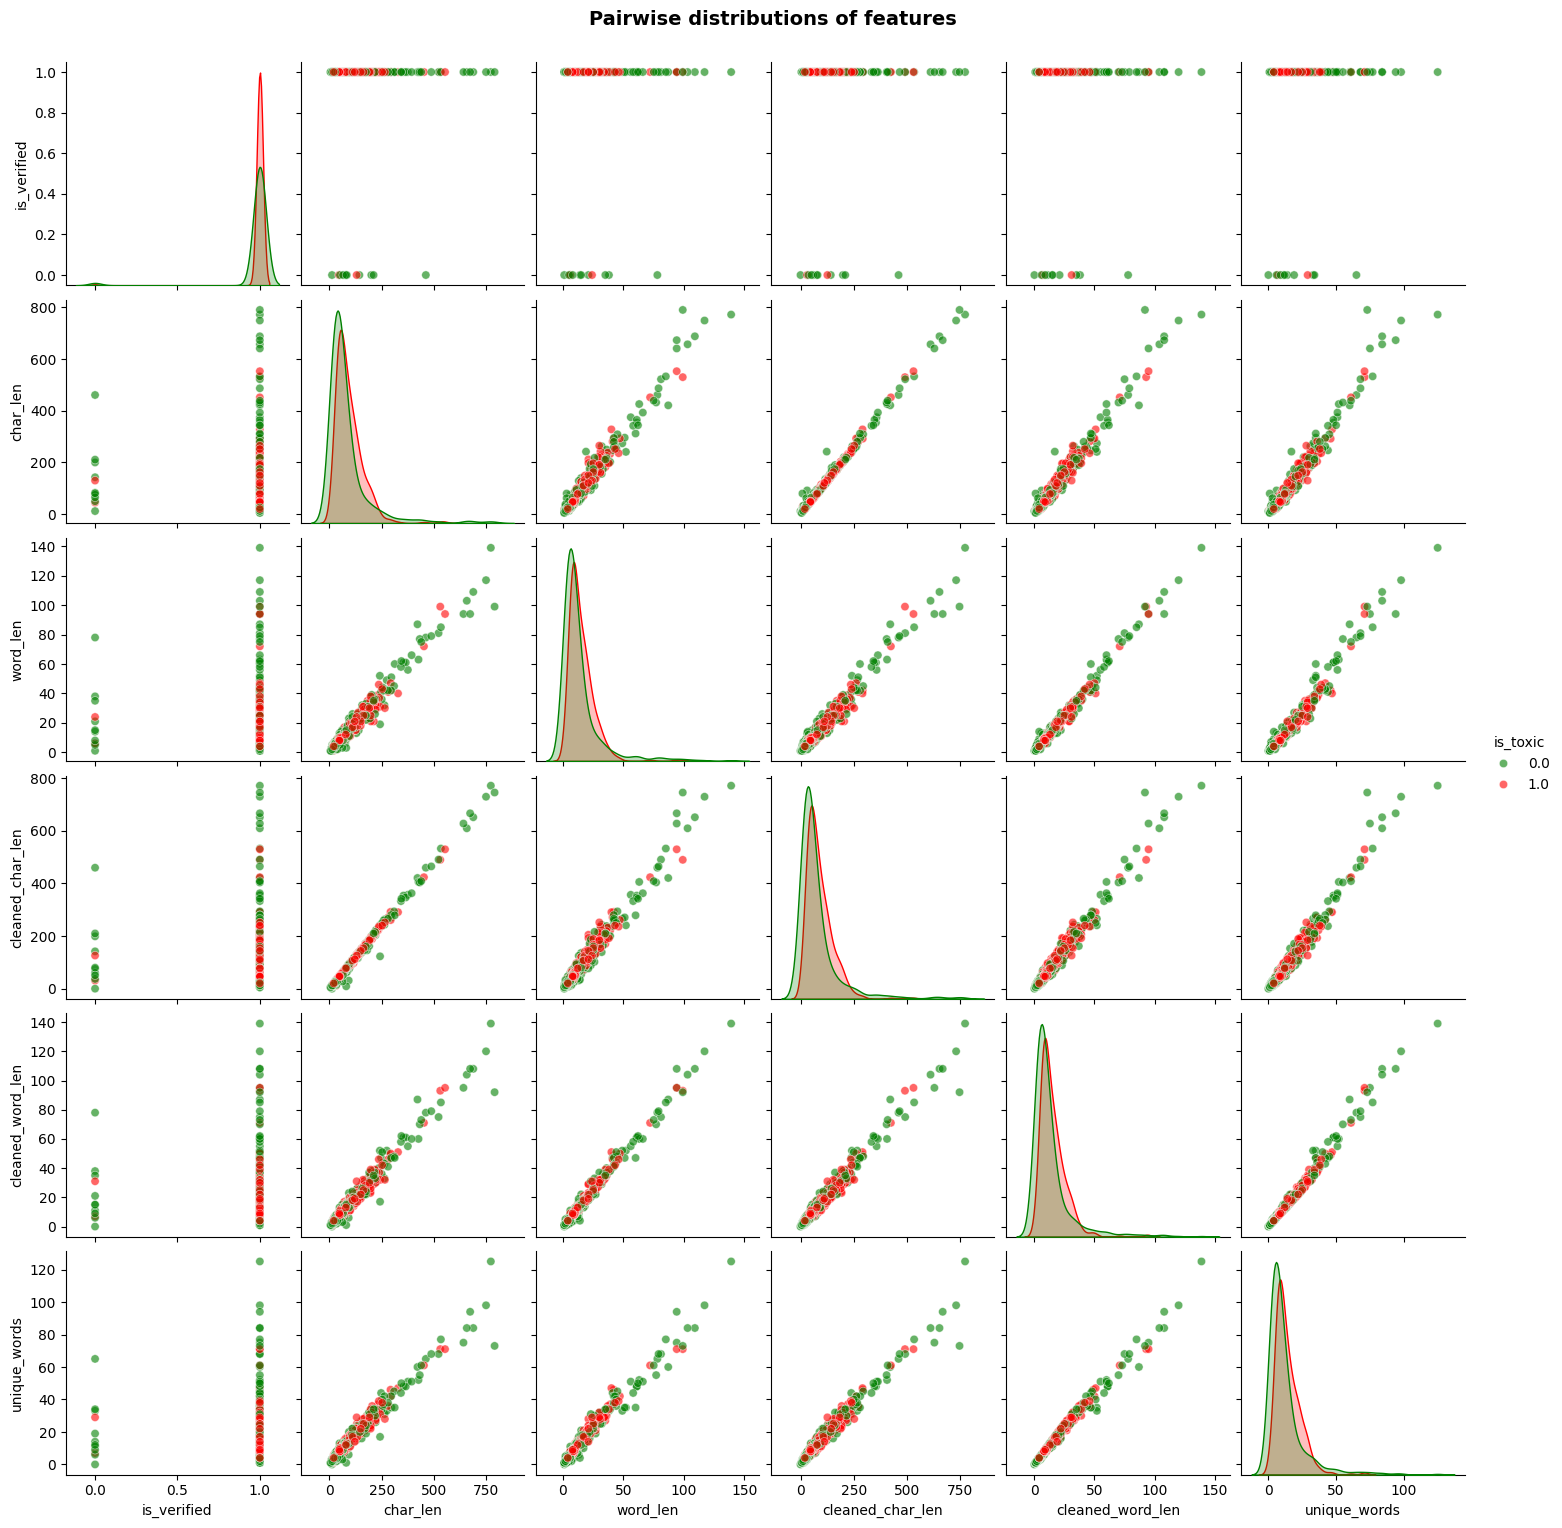

In [517]:
# Pairplot для ключевых признаков (на выборке)
sample_for_pairplot = df.sample(n=min(1000, len(df)), random_state=1)

sns.pairplot(sample_for_pairplot[numeric_features], 
             hue='is_toxic', palette={0: 'green', 1: 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise distributions of features', y=1.02, fontsize=14, fontweight='bold')
plt.show()


### 13. Распределение Ципфа (Zipf's Law)

> "Если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то частотность n-го слова в таком списке приблизительно обратно пропорциональна его порядковому номеру n (рангу этого слова)"

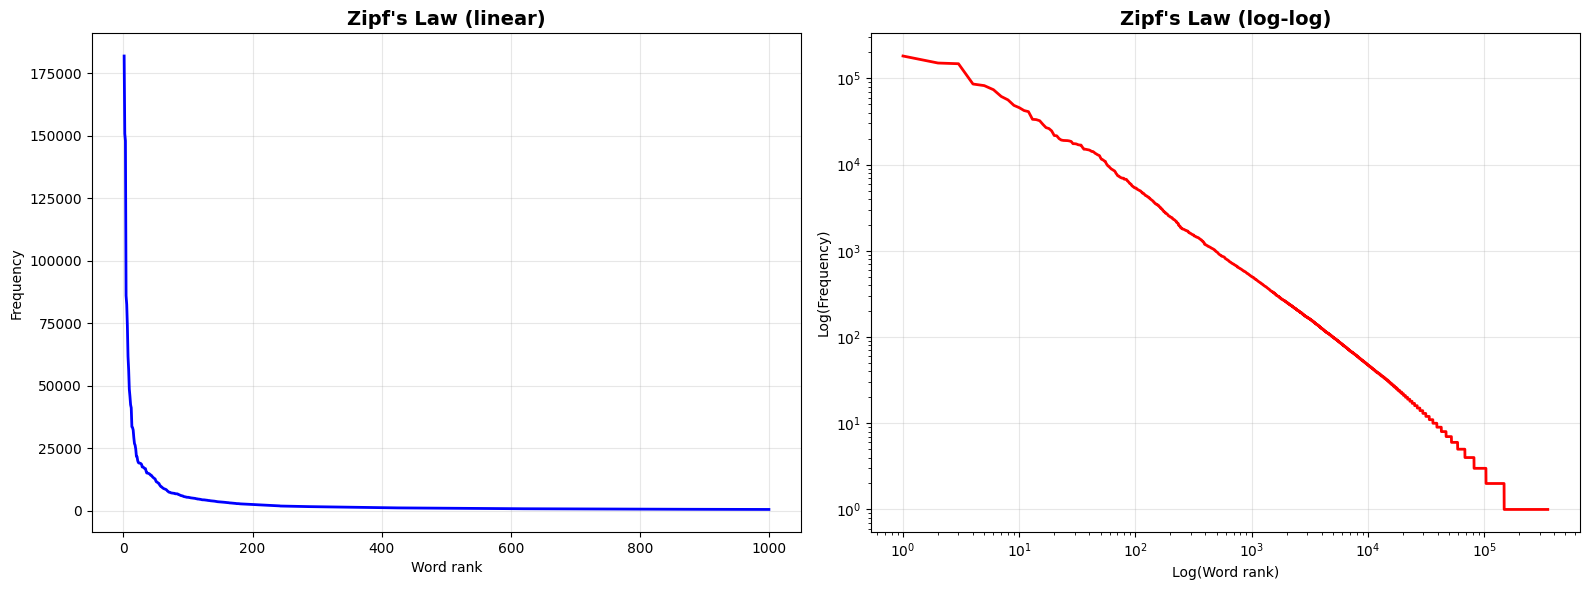

The log-log graph should be roughly linear for a natural language.


In [518]:
all_words = toxic_words + non_toxic_words
all_freq = Counter(all_words)

freqs_sorted = sorted(all_freq.values(), reverse=True)
ranks = np.arange(1, len(freqs_sorted) + 1)

_, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(ranks[:1000], freqs_sorted[:1000], 'b-', linewidth=2)
axes[0].set_title("Zipf's Law (linear)", fontsize=14, fontweight='bold')
axes[0].set_xlabel('Word rank')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].loglog(ranks, freqs_sorted, 'r-', linewidth=2)
axes[1].set_title("Zipf's Law (log-log)", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log(Word rank)')
axes[1].set_ylabel('Log(Frequency)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print('The log-log graph should be roughly linear for a natural language.')
